In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=dac4367065156ab8a3e8b89d0d207e98f51aea134347b1c6a22e3964e7b18909
  Stored in directory: /root/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.14
    Uninstalling kaggle-1.6.14:
      Successfully uninstalled kaggle-1.6.14


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          15501        323  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          11699        247  1.0              
ihelon/coffee-sales                                                 Coffee Sales                                         10KB  2024-07-03 20:04:43           3705         65  1.0              
suchintikasarkar/sentiment-analysis-for-

In [ ]:
!ls

kaggle.json  predicting-a-pulsar-star.zip  sample_data


In [ ]:
#!kaggle datasets download -d colearninglounge/predicting-pulsar-starintermediate

In [ ]:
!kaggle datasets download -d baiyuqi/predicting-a-pulsar-star

Dataset URL: https://www.kaggle.com/datasets/baiyuqi/predicting-a-pulsar-star
License(s): Apache 2.0
  0% 0.00/771k [00:00<?, ?B/s]
100% 771k/771k [00:00<00:00, 73.8MB/s]


In [ ]:
!unzip /content/predicting-a-pulsar-star.zip

Archive:  /content/predicting-a-pulsar-star.zip
  inflating: pulsar_stars.csv        


In [ ]:
!ls

kaggle.json  predicting-a-pulsar-star.zip  pulsar_stars.csv  sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import Pulsar star Dataset

In [ ]:
df=pd.read_csv('/content/pulsar_stars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


check null value in DF

In [ ]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [ ]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

short columns name of DF

In [ ]:
df.columns=['Mean IP','STD IP','Kurtosis IP','Skewness','Mean DM-SNR','STD DM-SNR','Kurtosis DM-SNR','Skewness DM-SNR','Label']
df.columns

Index(['Mean IP', 'STD IP', 'Kurtosis IP', 'Skewness', 'Mean DM-SNR',
       'STD DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR', 'Label'],
      dtype='object')

In [ ]:
df.describe()

,Mean IP,STD IP,Kurtosis IP,Skewness,Mean DM-SNR,STD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,Label
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [ ]:
df.head()

,Mean IP,STD IP,Kurtosis IP,Skewness,Mean DM-SNR,STD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,Label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df['Label'].value_counts()/np.float64(len(df))

Label
0    0.908426
1    0.091574
Name: count, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean IP          17898 non-null  float64
 1   STD IP           17898 non-null  float64
 2   Kurtosis IP      17898 non-null  float64
 3   Skewness         17898 non-null  float64
 4   Mean DM-SNR      17898 non-null  float64
 5   STD DM-SNR       17898 non-null  float64
 6   Kurtosis DM-SNR  17898 non-null  float64
 7   Skewness DM-SNR  17898 non-null  float64
 8   Label            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Use Boxplot to see outliers

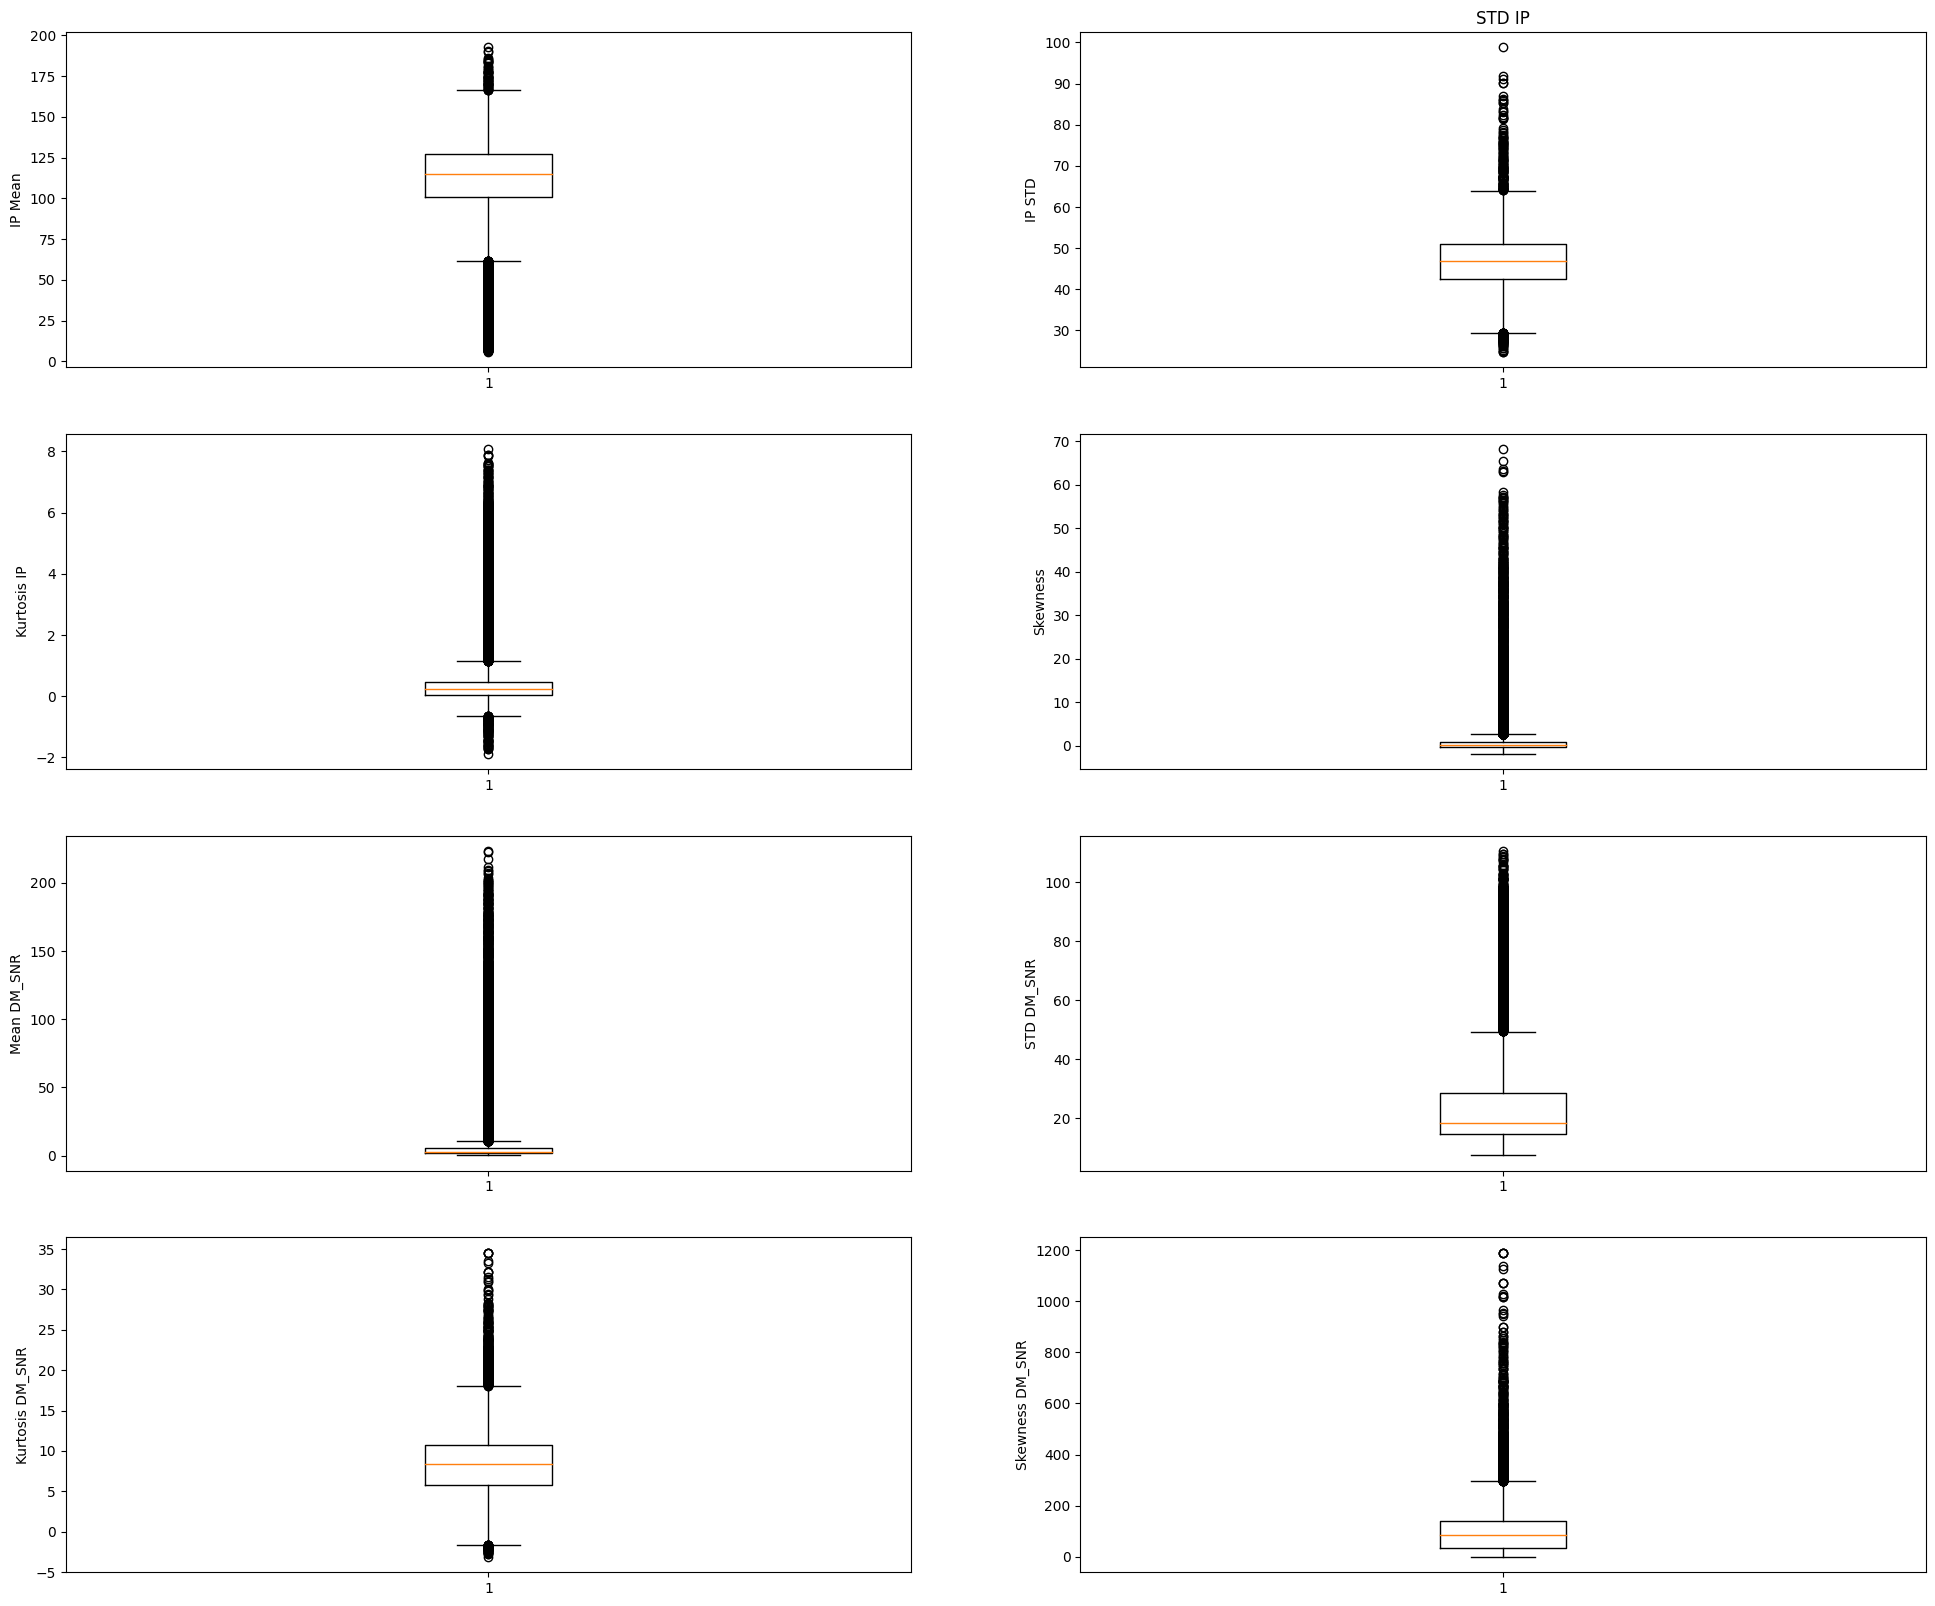

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(4,2,1)
plt.boxplot(df['Mean IP'])
#fig.set_title('')
plt.ylabel("IP Mean")

plt.subplot(4,2,2)
fig=plt.boxplot(df['STD IP'])
plt.title('STD IP')
plt.ylabel("IP STD")

plt.subplot(4,2,3)
fig=plt.boxplot(df['Kurtosis IP'])
#fig.set_title('')
plt.ylabel("Kurtosis IP")

plt.subplot(4,2,4)
plt.boxplot(df['Skewness'])
plt.title('')
plt.ylabel("Skewness")

plt.subplot(4,2,5)
plt.boxplot(df['Mean DM-SNR'])
plt.title('')
plt.ylabel("Mean DM_SNR")

plt.subplot(4,2,6)
plt.boxplot(df['STD DM-SNR'])
plt.title('')
plt.ylabel("STD DM_SNR")

plt.subplot(4,2,7)
plt.boxplot(df['Kurtosis DM-SNR'])
plt.title('')
plt.ylabel("Kurtosis DM_SNR")

plt.subplot(4,2,8)
plt.boxplot(df['Skewness DM-SNR'])
plt.title('')
plt.ylabel("Skewness DM_SNR")

plt.show()

Plot Histrogram to check distributions

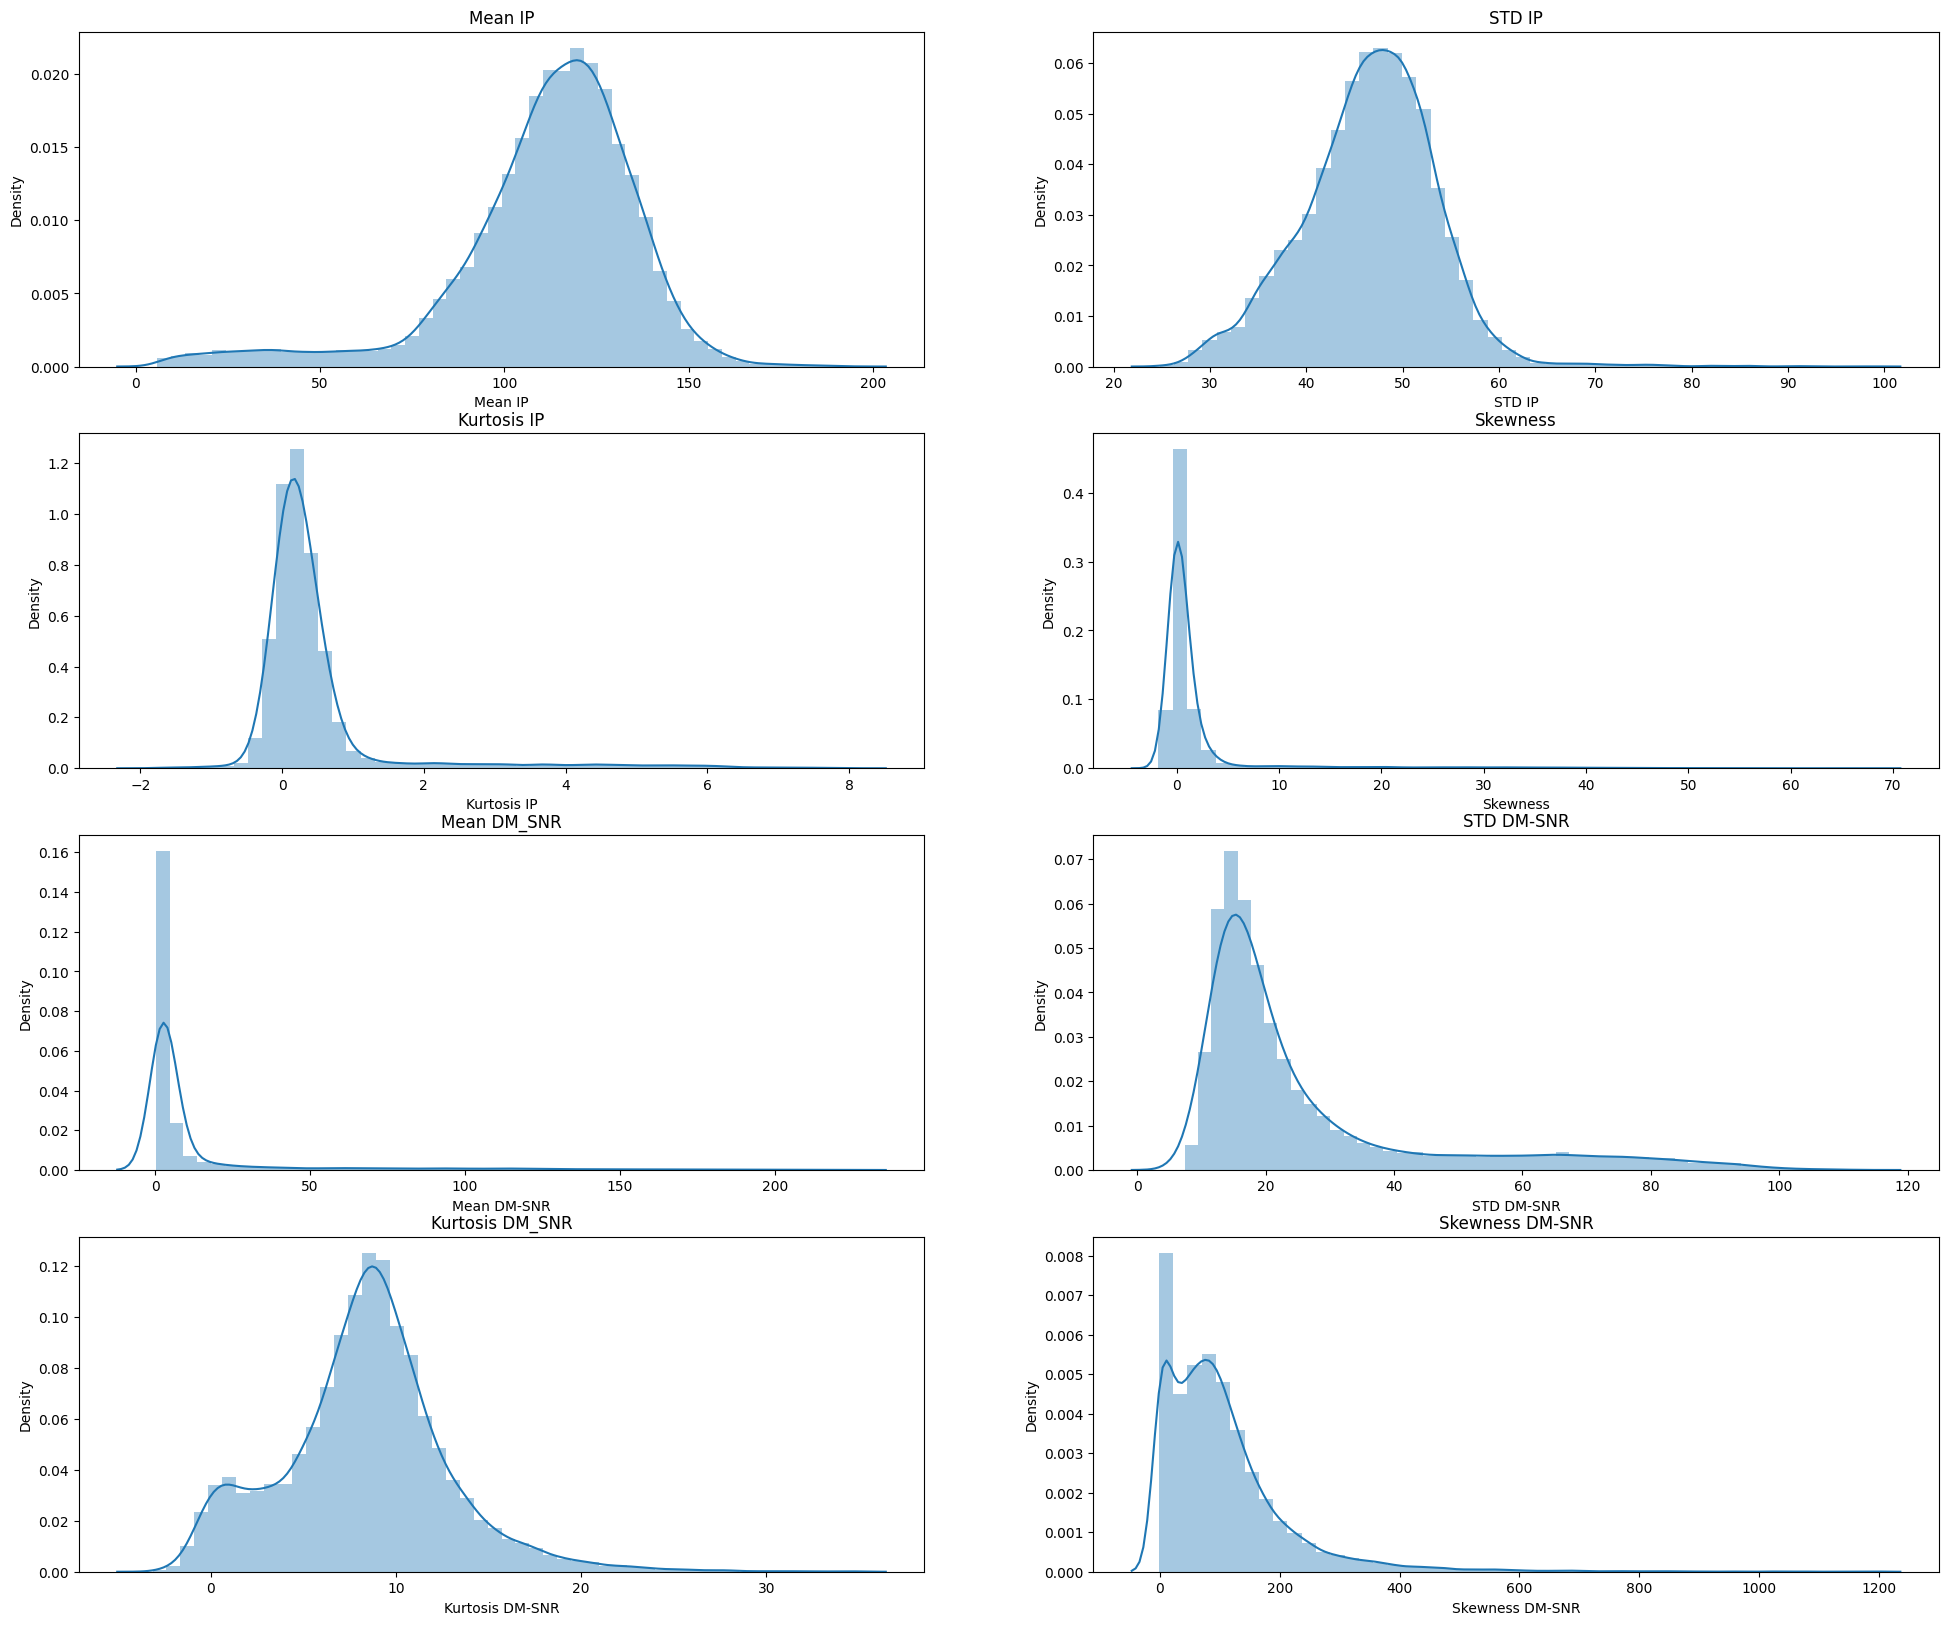

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(4,2,1)
sns.distplot(df['Mean IP'])
plt.title('Mean IP')

plt.subplot(4,2,2)
sns.distplot(df['STD IP'])
plt.title("STD IP")

plt.subplot(4,2,3)
sns.distplot(df['Kurtosis IP'])
plt.title('Kurtosis IP')

plt.subplot(4,2,4)
sns.distplot(df['Skewness'])
plt.title('Skewness')

plt.subplot(4,2,5)
sns.distplot(df['Mean DM-SNR'])
plt.title('Mean DM_SNR')

plt.subplot(4,2,6)
sns.distplot(df['STD DM-SNR'])
plt.title("STD DM-SNR")

plt.subplot(4,2,7)
sns.distplot(df['Kurtosis DM-SNR'])
plt.title('Kurtosis DM_SNR')

plt.subplot(4,2,8)
sns.distplot(df['Skewness DM-SNR'])
plt.title('Skewness DM-SNR')

plt.show()

In [ ]:
x=df.drop('Label',axis=1)
y=df['Label']
x.shape,y.shape

((17898, 8), (17898,))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean IP          17898 non-null  float64
 1   STD IP           17898 non-null  float64
 2   Kurtosis IP      17898 non-null  float64
 3   Skewness         17898 non-null  float64
 4   Mean DM-SNR      17898 non-null  float64
 5   STD DM-SNR       17898 non-null  float64
 6   Kurtosis DM-SNR  17898 non-null  float64
 7   Skewness DM-SNR  17898 non-null  float64
 8   Label            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


dataset split for training and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((14318, 8), (3580, 8))

Feature Scaling using Standard Scaler

In [ ]:
cols=x_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
type(x_train),type(x_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])

In [ ]:
cols,len(cols)

(Index(['Mean IP', 'STD IP', 'Kurtosis IP', 'Skewness', 'Mean DM-SNR',
        'STD DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR'],
       dtype='object'),
 8)

In [ ]:
x_train.describe()

,Mean IP,STD IP,Kurtosis IP,Skewness,Mean DM-SNR,STD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


train SVM model with default value

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"acuuracy {round(accuracy_score(y_test,y_pred),4)}")

acuuracy 0.9827


SVC parameter C=100 and Kernal =rbf

In [ ]:
svc=SVC(C=100)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"accuracy {round(accuracy_score(y_test,y_pred),4)}")

accuracy 0.9832


SVC c=1000

In [ ]:
svc=SVC(C=1000)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"accuracy {round(accuracy_score(y_test,y_pred),4)}")

accuracy 0.9816


SVC c=1 and kernal=linear

In [ ]:
linear_svc=SVC(kernel='linear')
linear_svc.fit(x_train,y_train)
y_pred_test=linear_svc.predict(x_test)
print(f'accuracy {round(accuracy_score(y_test,y_pred_test),4)}')

accuracy 0.983


SVC kernel=linear ,c=100

In [ ]:
linear_svc100=SVC(kernel='linear',C=100)
linear_svc100.fit(x_train,y_train)
y_pred=linear_svc100.predict(x_test)
print(f"accuracy {round(accuracy_score(y_test,y_pred),4)}")

accuracy 0.9832


SVC C=1000 Kernel=linear

In [ ]:
linear_svc1000=SVC(kernel='linear',C=1000)
linear_svc1000.fit(x_train,y_train)
y_pred=linear_svc1000.predict(x_test)
print(f"accuracy {round(accuracy_score(y_test,y_pred),4)}")

accuracy 0.9832


In [ ]:
y_pred_train=linear_svc.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

linear kernal accuracy and score

In [ ]:
print(f"accuracy {round(accuracy_score(y_train,y_pred_train),4)}")

accuracy 0.9783


In [ ]:
linear_svc.score(x_train,y_train)

0.9782790892582763

In [ ]:
linear_svc.score(x_test,y_test)

0.9829608938547486

In [ ]:
linear_svc100.score(x_train,y_train), linear_svc100.score(x_test,y_test)

(0.9784886157284537, 0.9832402234636871)

In [ ]:
y_test.value_counts()

Label
0    3306
1     274
Name: count, dtype: int64

In [ ]:
null_accuracy=(3306/(3306+274))
print("null accuracy score: {0:0.4f}".format(null_accuracy))

null accuracy score: 0.9235


SVC kernal= polynomial c=1

In [ ]:
svc=SVC(kernel='poly',C=1)
poly_svc=svc.fit(x_train,y_train)
y_pred=poly_svc.predict(x_test)
print(f'Polynomial acc {round(accuracy_score(y_test,y_pred),4)}')

Polynomial acc 0.9807


svc kernal=poly , C=100

In [ ]:
poly_svc100=SVC(kernel='poly',C=100)
poly_svc100.fit(x_train,y_train)
y_pred=poly_svc100.predict(x_test)
print(f"Poly 100 acc {round(accuracy_score(y_test,y_pred),4)}")

Poly 100 acc 0.9824


kernel=Poly c=1000

In [ ]:
poly_svc1000=SVC(kernel='poly',C=1000)
poly_svc1000.fit(x_train,y_train)
y_pred_poly1000=poly_svc1000.predict(x_test)
print(f"poly 1000 accu {round(accuracy_score(y_test,y_pred_poly1000),4)}")
print(f"score train {poly_svc1000.score(x_train,y_train)}\n test {poly_svc1000.score(x_test,y_test)}")

poly 1000 accu 0.9838
score train 0.9800251431764213
 test 0.9837988826815642


In [ ]:
poly_svc1500=SVC(kernel='poly',C=1500)
poly_svc1500.fit(x_train,y_train)
y_pred_poly1500=poly_svc1500.predict(x_test)
print(f"poly 1500 accu {round(accuracy_score(y_test,y_pred_poly1500),4)}")
print(f"score train {poly_svc1500.score(x_train,y_train)}\n test {poly_svc1500.score(x_test,y_test)}")

poly 1500 accu 0.9838
score train 0.9799553010196955
 test 0.9837988826815642


SVM kernel=polynomial , C= 2000

In [ ]:
poly_svc2000=SVC(kernel="poly",C=2000)
poly_svc2000.fit(x_train,y_train)
y_pred_poly2000=poly_svc2000.predict(x_test)
print(f"poly 2000 {round(accuracy_score(y_test,y_pred_poly2000),4)}\n score train {poly_svc2000.score(x_train,y_train)}\n  test {poly_svc2000.score(x_test,y_test)}")

poly 2000 0.9844
 score train 0.9801648274898729
  test 0.9843575418994414


VSC kernal=poly C=4000

In [ ]:
poly_svc4000=SVC(kernel='poly',C=4000)
poly_svc4000.fit(x_train,y_train)
y_pred_poly4000=poly_svc4000.predict(x_test)
print(f"Poly 4000 Accu {round(accuracy_score(y_test,y_pred_poly4000),4)}\n Score train {poly_svc4000.score(x_train,y_train)}")
print(f"  test  {poly_svc4000.score(x_test,y_test)}")

Poly 4000 Accu 0.9844
 Score train 0.9802346696465987
  test  0.9843575418994414


SVC kernal=Poly, C=5000

In [ ]:
poly_svc5000=SVC(kernel="poly",C=5000)
poly_svc5000.fit(x_train,y_train)
y_pred_poly5000=poly_svc5000.predict(x_test)
print(f"Poly 5000 Accu {round(accuracy_score(y_test,y_pred_poly5000),4)} ")
print(f"Score train {poly_svc5000.score(x_train,y_train)}\n test {poly_svc5000.score(x_test,y_test)}")

Poly 5000 Accu 0.9841 
Score train 0.9800949853331471
 test 0.9840782122905027


SVC kernel=sigmoid c=1

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid',C=1)
sigmoid_svc.fit(x_train,y_train)
y_pred=sigmoid_svc.predict(x_test)
print(f"sigmoid 1 accu {round(accuracy_score(y_test,y_pred),4)}")

sigmoid 1 accu 0.8858


svc kernla= sigmoid c=100

In [ ]:
sigmoid_svc100=SVC(kernel="sigmoid",C=100)
sigmoid_svc100.fit(x_train,y_train)
y_pred=sigmoid_svc100.predict(x_test)
print(f"sigmoid 100 accu {round(accuracy_score(y_test,y_pred),4)}")

sigmoid 100 accu 0.8855


kernel =Sigmoid c=1000

In [ ]:
sigmoid_svc1000=SVC(kernel='sigmoid',C=1000)
sigmoid_svc1000.fit(x_train,y_train)
y_pred_sigmoid1000=sigmoid_svc1000.predict(x_test)
print(f"sigmoid 1000  {round(accuracy_score(y_test,y_pred_sigmoid1000),4)}")
print(f"score {sigmoid_svc1000.score(x_test,y_test)}")

sigmoid 1000  0.8855
score 0.8854748603351955


In [ ]:
"""from sklearn.metrics import pair_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
ma=metrics.ConfusionMatrixDisplay(linear_svc,x_test,y_test)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()
accuracy_score(y_test,y_pred_test)
"""

'from sklearn.metrics import pair_confusion_matrix\n#from sklearn.metrics import plot_confusion_matrix\nfrom sklearn import metrics\nma=metrics.ConfusionMatrixDisplay(linear_svc,x_test,y_test)\nplt.xlabel("Predict")\nplt.ylabel("Actual")\nplt.show()\naccuracy_score(y_test,y_pred_test)\n'

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[3289   17]
 [  44  230]]


Confusion amtrix of linear kernel

<Axes: >

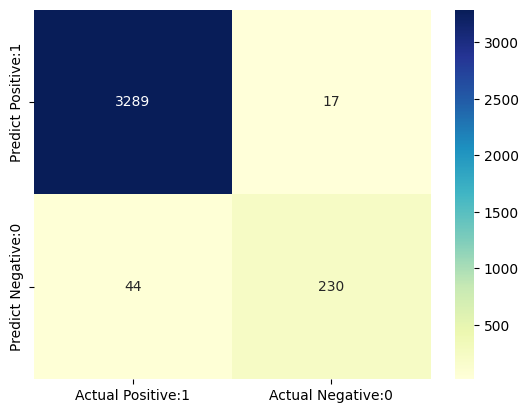

In [ ]:
cm_matrix = pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],
                         index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

confusion metrix of polynomial kernal with c=1000

<Axes: >

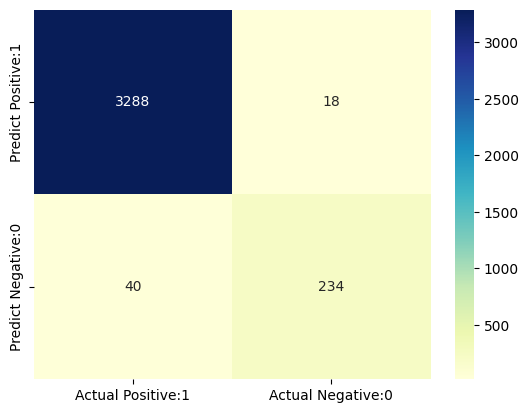

In [ ]:
cm_poly1000=confusion_matrix(y_test,y_pred_poly1000)
col_cm=["Actual Positive:1","Actual Negative:0"]
row_cm=["Predict Positive:1","Predict Negative:0"]
cm_matrix_poly1000=pd.DataFrame(data=cm_poly1000,columns=col_cm,index=row_cm)
sns.heatmap(cm_matrix_poly1000,annot=True,fmt='d',cmap='YlGnBu')

<Axes: >

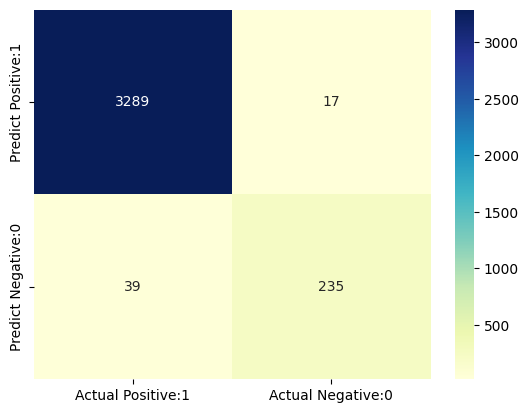

In [ ]:
cm_poly2000=confusion_matrix(y_test,y_pred_poly2000)
cm_matrix_poly2000=pd.DataFrame(data=cm_poly2000,columns=col_cm,index=row_cm)
sns.heatmap(cm_matrix_poly2000,annot=True,fmt='d',cmap='YlGnBu')

<Axes: >

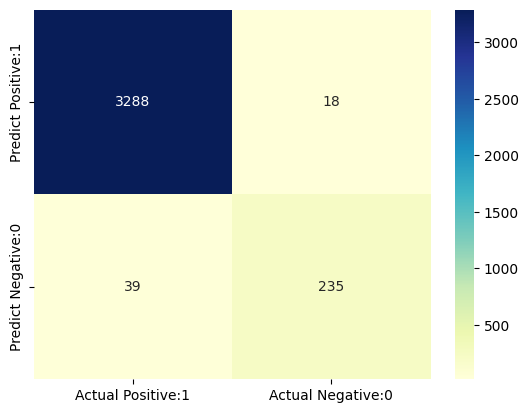

In [ ]:
cm_poly5000=confusion_matrix(y_test,y_pred_poly5000)
cm_matrix_poly5000=pd.DataFrame(data=cm_poly5000,columns=col_cm,index=row_cm)
sns.heatmap(cm_matrix_poly5000,annot=True,fmt='d',cmap="YlGnBu")

Classification metrics of linear and polynomial kernal

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
print(classification_report(y_test,y_pred_poly2000))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.86      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
cm,cm_poly2000

(array([[3289,   17],
        [  44,  230]]),
 array([[3289,   17],
        [  39,  235]]))

In [ ]:
classification_accuracy=(cm[0,0]+cm[1,1])/ float(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print(f"Classification Accuracy : {round(classification_accuracy,4)}")

Classification Accuracy : 0.983


In [ ]:
classification_accuracy_poly2000=(cm_poly2000[0,0]+cm_poly2000[1,1])/ float(cm_poly2000[0,0]+cm_poly2000[1,1]+cm_poly2000[0,1]+cm_poly2000[1,0])
print(f"Classification Accuracy Poly 2000  {round(classification_accuracy_poly2000,4)}")

Classification Accuracy Poly 2000  0.9844


In [ ]:
classification_error=(cm[0,1]+cm[1,0])/float(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
classification_error_poly2000=(cm_poly2000[0,1]+cm_poly2000[1,0])/ float(cm_poly2000[1,1]+cm_poly2000[0,0]+cm_poly2000[1,0]+cm_poly2000[0,1])
print(f"Classification Error : {round(classification_error,4)}")
print(f"Classification error Poly 2000 {round(classification_error,4)}")

Classification Error : 0.017
Classification error Poly 2000 0.017


In [ ]:
precision=cm[0,0]/float(cm[0,1]+cm[0,0])
precision_poly2000=cm_poly2000[0,0]/float(cm_poly2000[0,1]+cm_poly2000[0,0])
print(f"  Precision \n linear {round(precision,5)}")
print(f" Poly   {round(precision_poly2000,5)}")

  Precision 
 linear 0.99486
 Poly   0.99486


In [ ]:
recall=cm[0,0]/float(cm[0,0]+cm[1,0])
recall_poly2000=cm_poly2000[0,0]/float(cm_poly2000[0,0]+cm_poly2000[1,0])
print(f"Recall \n linear {round(recall,4)}")
print(f"  Poly  {round(recall_poly2000,4)} ")


Recall 
 linear 0.9868
  Poly  0.9883 


In [ ]:
false_positive=cm[0,1]/float(cm[0,1]+cm[1,1])
false_positive_poly2000=cm_poly2000[0,1]/float(cm_poly2000[0,1]+cm_poly2000[1,1])
print(f"False Positive \n linear {round(false_positive,4)}")
print(f"Poly {round(false_positive_poly2000,4)}")

False Positive 
 linear 0.0688
Poly 0.0675


In [ ]:
specificity=cm[1,1]/float(cm[0,1]+cm[1,1])
specificity_poly2000=cm_poly2000[1,1]/float(cm_poly2000[1,1]+cm_poly2000[0,1])
print(f"Specificity \n Linear {round(specificity,4)}")
print(f"Poly {round(specificity_poly2000,4)}")

Specificity 
 Linear 0.9312
Poly 0.9325


In [ ]:
from sklearn.metrics import roc_curve,f1_score,roc_auc_score
f1_linear=f1_score(y_test,y_pred_test)
f1_poly2000=f1_score(y_test,y_pred_poly2000)
print(f"F1 score \n Linear  {round(f1_linear,5)}")
print(f"Poly  {round(f1_poly2000,5)}")

F1 score 
 Linear  0.88292
Poly  0.89354


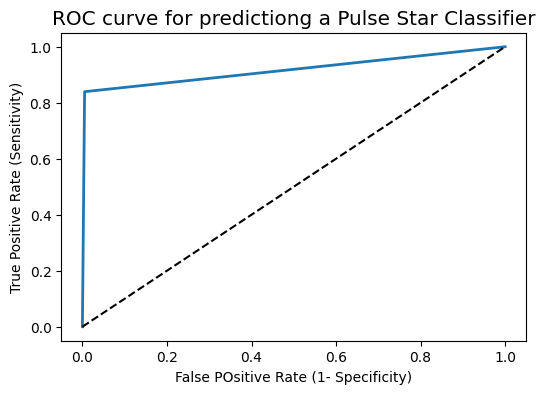

In [ ]:
fpr,tpr, thresholds =roc_curve(y_test,y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.rcParams["font.size"] =12
plt.title("ROC curve for predictiong a Pulse Star Classifier")
plt.xlabel("False POsitive Rate (1- Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()


In [ ]:
y_pred_test.shape,y_pred_poly2000.shape,y_test.shape

((3580,), (3580,), (3580,))

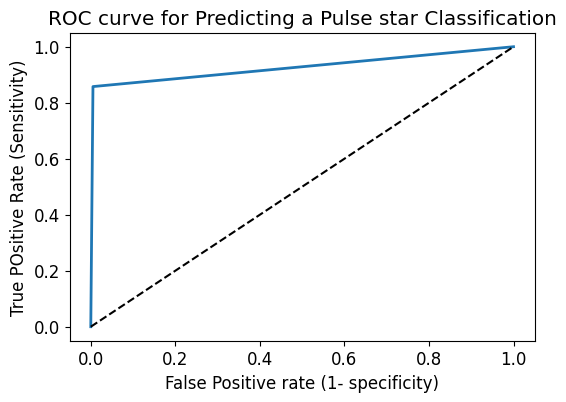

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_poly2000)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.rcParams["font.size"]=12
plt.title("ROC curve for Predicting a Pulse star Classification")
plt.xlabel("False Positive rate (1- specificity)")
plt.ylabel("True POsitive Rate (Sensitivity)")
plt.show()

In [ ]:
roc_linear=roc_auc_score(y_test,y_pred_test)
roc_poly2000=roc_auc_score(y_test,y_pred_poly2000)
print(f"    ROC Score\n linear  {round(roc_linear,5)}")
print(f" Poly {round(roc_poly2000,5)}")

    ROC Score
 linear  0.91714
 Poly 0.92626


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(linear_svc,x_train,y_train,cv=10,
                          scoring='roc_auc').mean()
cross_val_poly2000=cross_val_score(poly_svc2000,x_train,y_train,
                        cv=10,scoring='roc_auc').mean()
print(f'Crosss validare ROC AUC \n linear {round(cross_val,5)}')
print(f"POly2000   {round(cross_val_poly2000,5)}")

Crosss validare ROC AUR 
 linear 0.97563
POly2000   0.95641


cross_val_score(poly_svc2000,x_train,y_train,
                        cv=10,scoring='roc_auc')

In [ ]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
Linear_svc1=SVC(kernel='linear')
linear_scores=cross_val_score(Linear_svc1,x_train,y_train,cv=kfold)

In [ ]:
print(f"Stratified cross-validation score with Linear kernal \n{linear_scores}")

Stratified cross-validation score with Linear kernal 
[0.97870112 0.98009777 0.98009777 0.97764583 0.97555012]


In [ ]:
print(f"Average {linear_scores.mean()}")

Avgerage 0.9784185192701331


In [ ]:
Poly_svc1=SVC(kernel='poly',C=2000)
Poly_scores=cross_val_score(Poly_svc1,x_train,y_train,cv=kfold)
print(f"Stratified cross-validataion score with Poly kernel\n{Poly_scores}")
print(f"\n Average with Poly kernel \n {Poly_svc1.mean()}")

In [ ]:
print(f" stacratified score  {Poly_scores}\n average  {Poly_svc1.mean()}")

GridSearchCV for hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
Svc=SVC()
parameters=[{'C':[1,100,1000],"kernel":["linear"]},
            {"C":[1,100,1000],'kernel':['rbf'],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[100, 1000,2000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]
grid_search=GridSearchCV(estimator=Svc,param_grid=parameters,
                        scoring='accuracy',cv=5,verbose=0 )
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [100, 1000, 2000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
print(f"Best score {grid_search.best_score_}")
print(f"Best parameters  {grid_search.best_params_}")
print(f"Beat model  {grid_search.best_estimator_}")

Best score 0.9788378063796033
Best parameters  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Beat model  SVC(C=100, gamma=0.1)


In [ ]:
print(f"Test score  {grid_search.score(x_test,y_test)}")

Test score  0.9832402234636871


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((14318, 8), (14318,), (3580, 8), (3580,))

Both LinearSVC and SVC in scikit-learn are used for Support Vector Machine classification. However, they have key differences:
Implementation:
LinearSVC:
Implemented **using the liblinear library**, which is **optimized for linear SVMs**.
SVC(kernel='linear'):
Implemented **using the libsvm library**, which offers a more general SVM implementation.

Scalability:
LinearSVC: Scales better to **large datasets (especially with many samples)** due to its implementation.
SVC(kernel='linear'): Can be **slower for large datasets**.

Loss Function and Regularization:
LinearSVC: Uses **squared hinge loss **by default, and regularizes the intercept term. Offers flexibility to choose different loss functions (e.g., hinge loss) and penalties (L1, L2).
SVC(kernel='linear'): Uses **hinge loss** by default, and does not regularize the intercept term.
Multiclass Classification:
LinearSVC: Uses the **one-vs-rest strategy** for multiclass classification.
SVC: Uses the **one-vs-one strategy** for multiclass classification.

Probability Estimates:
LinearSVC: Does **not provide probability estimates directly**.
SVC: Can **provide probability estimates using the probability=True parameter, but this requires additional computation**.

Which one to use?
For large datasets with many samples: LinearSVC is generally preferred due to its scalability.
For small datasets or when needing probability estimates: SVC(kernel='linear') might be preferred.
For non-linear classification: Use SVC with non-linear kernels (e.g., kernel='rbf').

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
poly_pipeline=Pipeline((("Polynomial Feature",PolynomialFeatures(degree=3)),
                        ("Scaler",StandardScaler()),
                        ("SVM",LinearSVC(C=450,loss='hinge'))),
                       )
poly_pipeline.fit(train_x,train_y)
pred_y=poly_pipeline.predict(test_x)
print(f" Pipeline  accu {round(accuracy_score(test_y,pred_y),4)}")
print(f"SCore {round(poly_pipeline.score(train_x,train_y),4)}")

 Pipeline  accu 0.9821
SCore 0.9793


In [ ]:
poly1000_pipeline=Pipeline((("POlY",PolynomialFeatures(degree=3) ),
                            ("Scaler",StandardScaler()),
                            ("SVM",LinearSVC(C=500,loss='hinge'))))
poly1000_pipeline.fit(train_x,train_y)
pred_y1000=poly1000_pipeline.predict(test_x)
print(f"Pipeline 500 accu {round(accuracy_score(test_y,pred_y1000),4)}")
print(f"score test  {round(poly1000_pipeline.score(test_x,test_y),4)}")
print(f"Score {round(poly1000_pipeline.score(train_x,train_y),4)}")

Pipeline 500 accu 0.7992
score test  0.7992
Score 0.8072


In [ ]:
pipeline_svc=Pipeline((('scaler',StandardScaler()),
                       ("SVM",LinearSVC(C=1100,loss="hinge"))))
pipeline_svc.fit(train_x,train_y)
pred_y_pipelinesvc=pipeline_svc.predict(test_x)
print(f"Pipeline SVC accu {round(accuracy_score(test_y,pred_y_pipelinesvc),4)}")
print(f"score test {round(pipeline_svc.score(test_x,test_y),4)}")
print(f"score train {round(pipeline_svc.score(train_x,train_y),4)}")

Pipeline SVC accu 0.9841
score test 0.9841
score train 0.9785


In [ ]:
poly_svc100.recll(x_train,y_train)

NameError: name 'poly_svc100' is not defined